<a href="https://colab.research.google.com/github/shaly-ct/AI-and-Machine-Learning/blob/main/Personal_Loan_Campaign_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Problem Statement**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.
You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

##**Objective**
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

### **Data Dictionary**


*  ** ID**: Customer ID
* **Age**: Customer's age in completed years
* **Experience** : Number of years of professional experience
* **Income** : Annual income of the customer (in thousand dollars)
* **ZIP Code** : Home address ZIP code
* **Family** : The family size of the customer
* **CCAvg**: Average spending on credit cards per month (in thousand dollars)
* **Education**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **Mortgage**: Value of house mortgage if any (in thousand dollars)
* **Personal_Loan**: Did this customer accept the personal loan offered in the last campaign?
* **Securities_Account**: Does the customer have a securities account with the bank?
* **CD_Account**: Does the customer have a certificate of deposit (CD) account with the bank?
* **Online**: Do customers use Internet banking facilities?
* **CreditCard**: Does the customer use a credit card issued by any other bank (excluding All Life Bank)?




## **Importing necessary libraries**


In [ ]:
#Importing necessary libraries

# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

#to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#for fine tuning
from sklearn.model_selection import GridSearchCV

#to compare and evaluate
from sklearn.metrics import (confusion_matrix,
  accuracy_score,
  recall_score,
  precision_score,
  f1_score,
  classification_report
  )


# **Loading the data**

In [ ]:
#Read from csv
customer_data = pd.read_csv('/content/drive/MyDrive/Python Course/Personal loan campaign/Loan_Modelling.csv')
data = customer_data.copy()

# **Data Overview**

In [ ]:
#get number of rows and columns
data.shape

(5000, 14)

In [ ]:
#view top 5 rows
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
#view last 5 rows
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


####Observations:
* There are 13 numerical variables
* Although Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard are intepreted as numerical they are categorical which are already encoded.
* ID may not be relevant to decision trees
* ZIP codes needs to be looked upon if they can be categorised and encoded.


In [ ]:
#get statistical summary
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [ ]:
#Check for missing value
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no null values to be treated

In [ ]:
data.duplicated().sum()

np.int64(0)

* There are no duplicates

# **Exploratory data analysis**

### Univariate Analysis

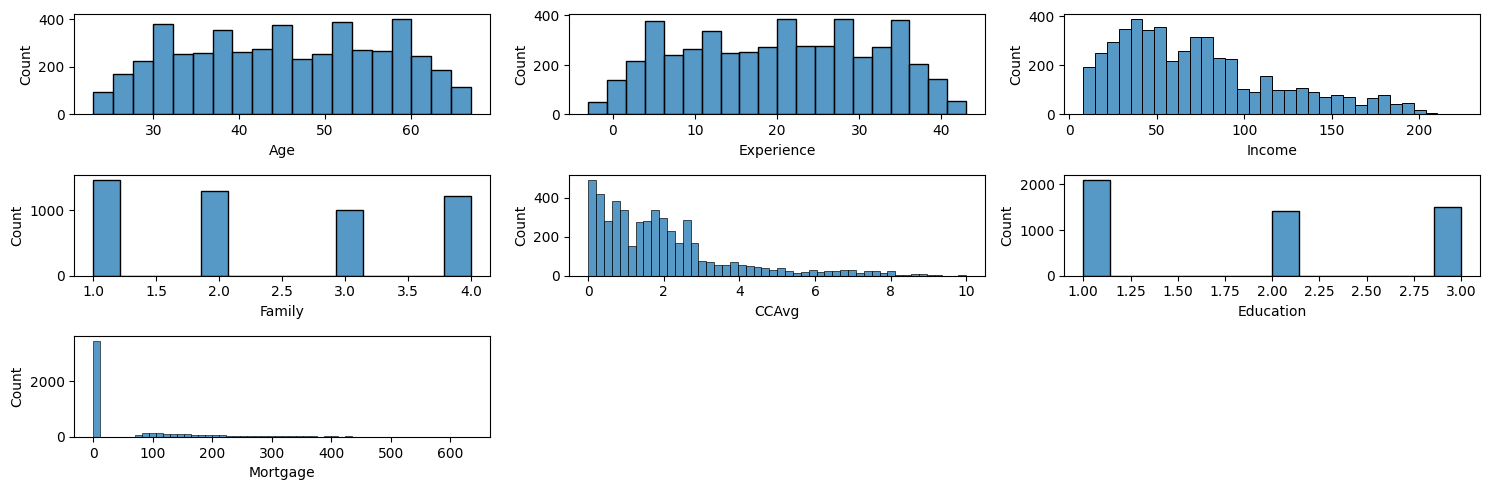

In [ ]:
#defining plot size
plt.figure(figsize=(15,5))

#defining the columns for plotting
columns = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage']

#Creating histplot
for i,col in enumerate(columns):
  plt.subplot(3, 3, i+1)
  sns.histplot(data=data,x=col)
plt.tight_layout()

* Income and CCAvg exibit right skewed
* Most of them do not have Mortgage

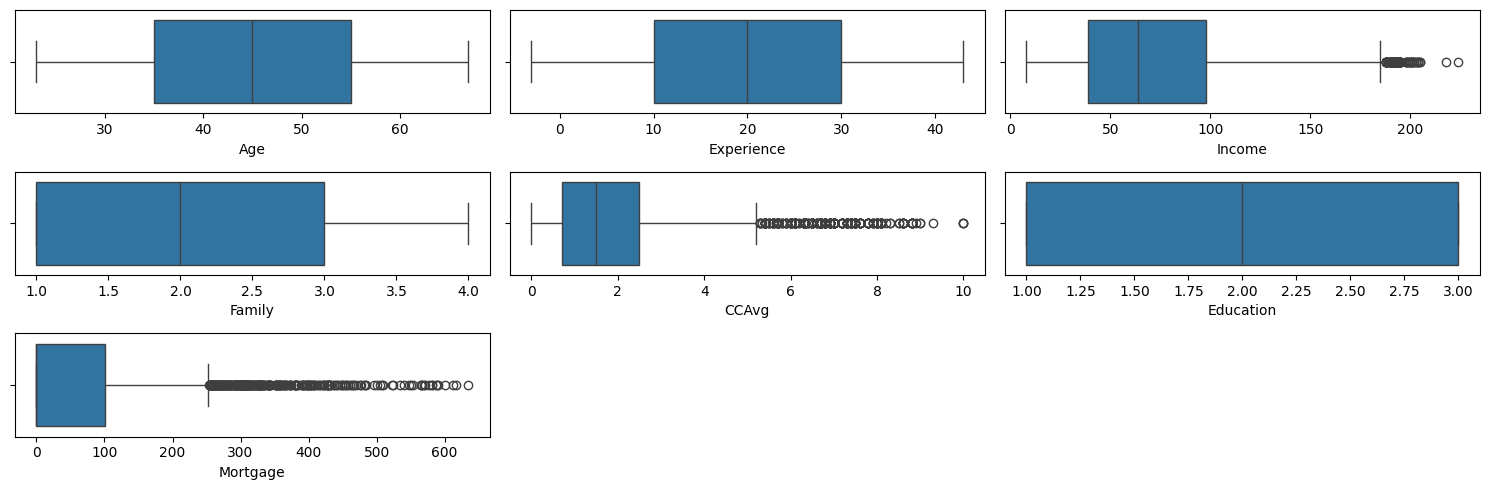

In [ ]:
#defining plot size
plt.figure(figsize=(15,5))

#defining the columns for plotting
columns = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage']

#Creating a boxplot
for i,col in enumerate(columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=data,x=col)
plt.tight_layout()

* There are outliers in Income,Mortgage and CCAvg
* 75% of the customers have income less the hundred thousand dollars
* 75% of the customers have less than 3 family members
* 75% of the customers have less than 30 years of experience
* Average age of the customers is 45
* Average professional experience of customer is 20

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


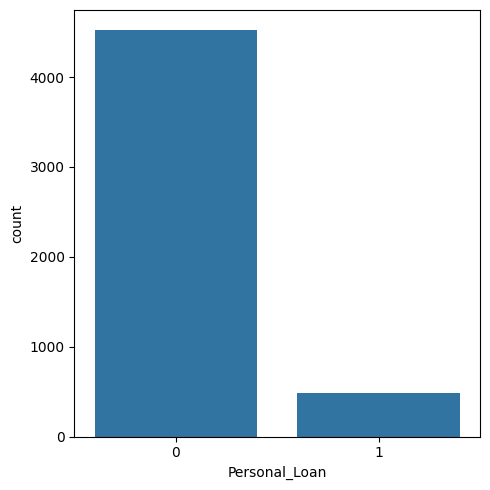

In [ ]:
#Creating count plot for Personal loan
plt.figure(figsize=(5,5))
print(100*data['Personal_Loan'].value_counts(normalize=True))
sns.countplot(data=data,x='Personal_Loan')
plt.tight_layout()

* ~90% of the customers did not accept the personal loan in previous campaign

Securities_Account
0    89.56
1    10.44
Name: proportion, dtype: float64


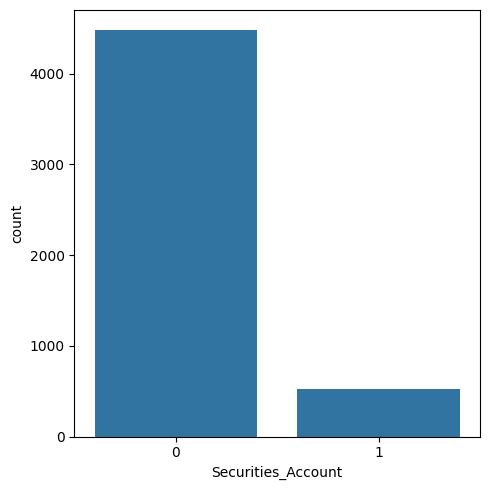

In [ ]:
#Creating count plot for Securities_Account
plt.figure(figsize=(5,5))
print(100*data['Securities_Account'].value_counts(normalize=True))
sns.countplot(data=data,x='Securities_Account')
plt.tight_layout()

* * Only ~6% of the customers who opted for personal loan have securities account

CD_Account
0    93.96
1     6.04
Name: proportion, dtype: float64


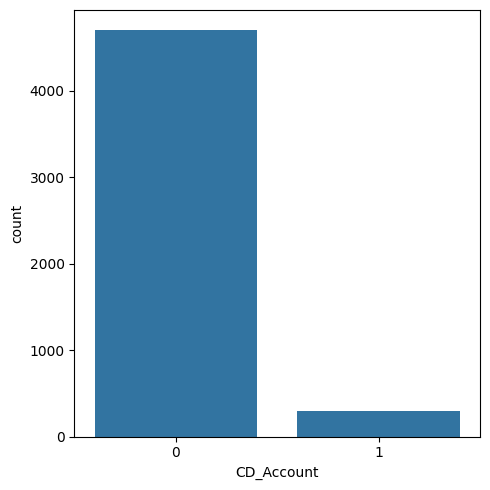

In [ ]:
#Creating count plot for CD_Account
plt.figure(figsize=(5,5))
print(100*data['CD_Account'].value_counts(normalize=True))
sns.countplot(data=data,x='CD_Account')
plt.tight_layout()

* Only ~6% of the customers who opted for personal loan have CD account



Online
1    59.68
0    40.32
Name: proportion, dtype: float64


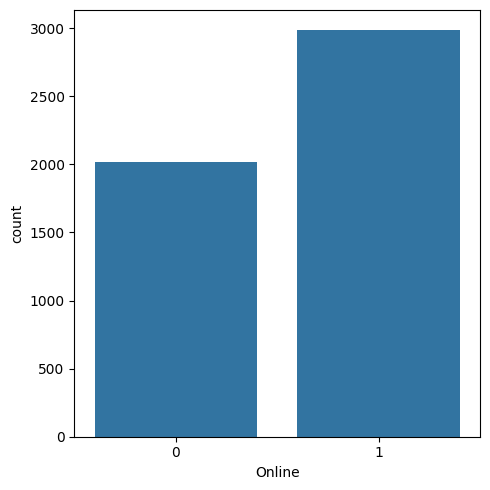

In [ ]:
#Creating count plot for Online
plt.figure(figsize=(5,5))
print(100*data['Online'].value_counts(normalize=True))
sns.countplot(data=data,x='Online')
plt.tight_layout()

* Close to 60% of the customers who opted for personal loan have Online banking facilities

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64


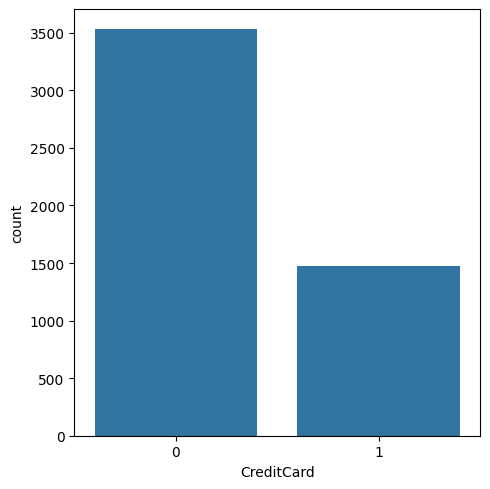

In [ ]:
#Creating count plot for CreditCard
plt.figure(figsize=(5,5))
print(100*data['CreditCard'].value_counts(normalize=True))
sns.countplot(data=data,x='CreditCard')
plt.tight_layout()

* ~70% of the customers who opted for personal loan do not have credt card

### Bivariate Analysis

<Axes: >

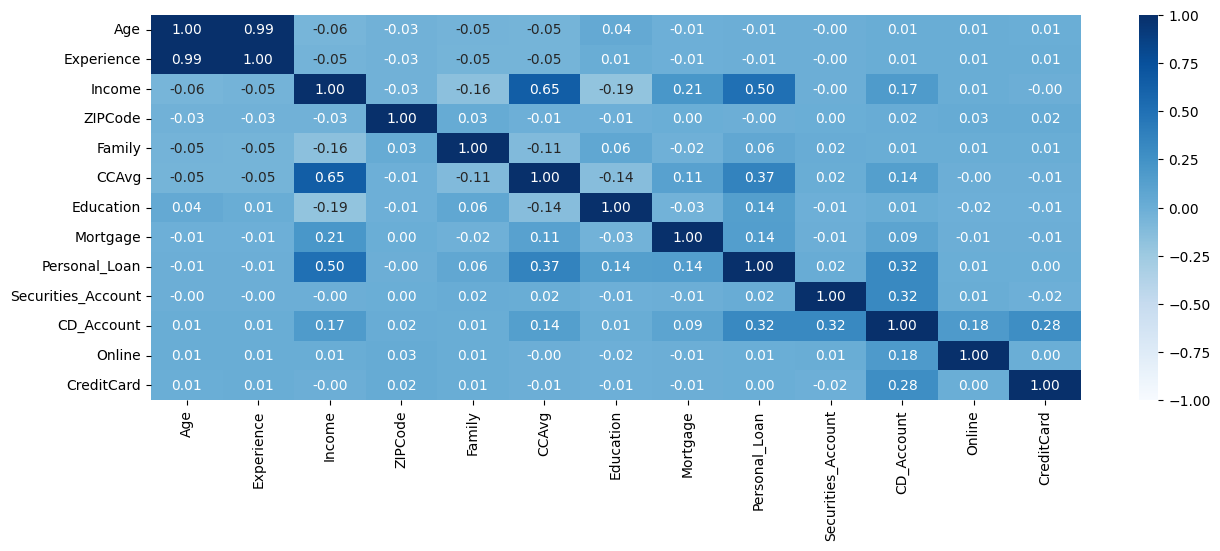

In [ ]:
#set the fetures for heatmap
features = ['Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

#Creating heatmap
plt.figure(figsize=(15,5,))
sns.heatmap(data=data[features].corr(),annot=True,vmin=-1,vmax=1,fmt=".2f",cmap='Blues')

* There is a very high correlation between age and experience.
* Income and CCAvg has positive correlation.
* Income and personal loan is also positively correlated.


<Figure size 2500x1500 with 0 Axes>

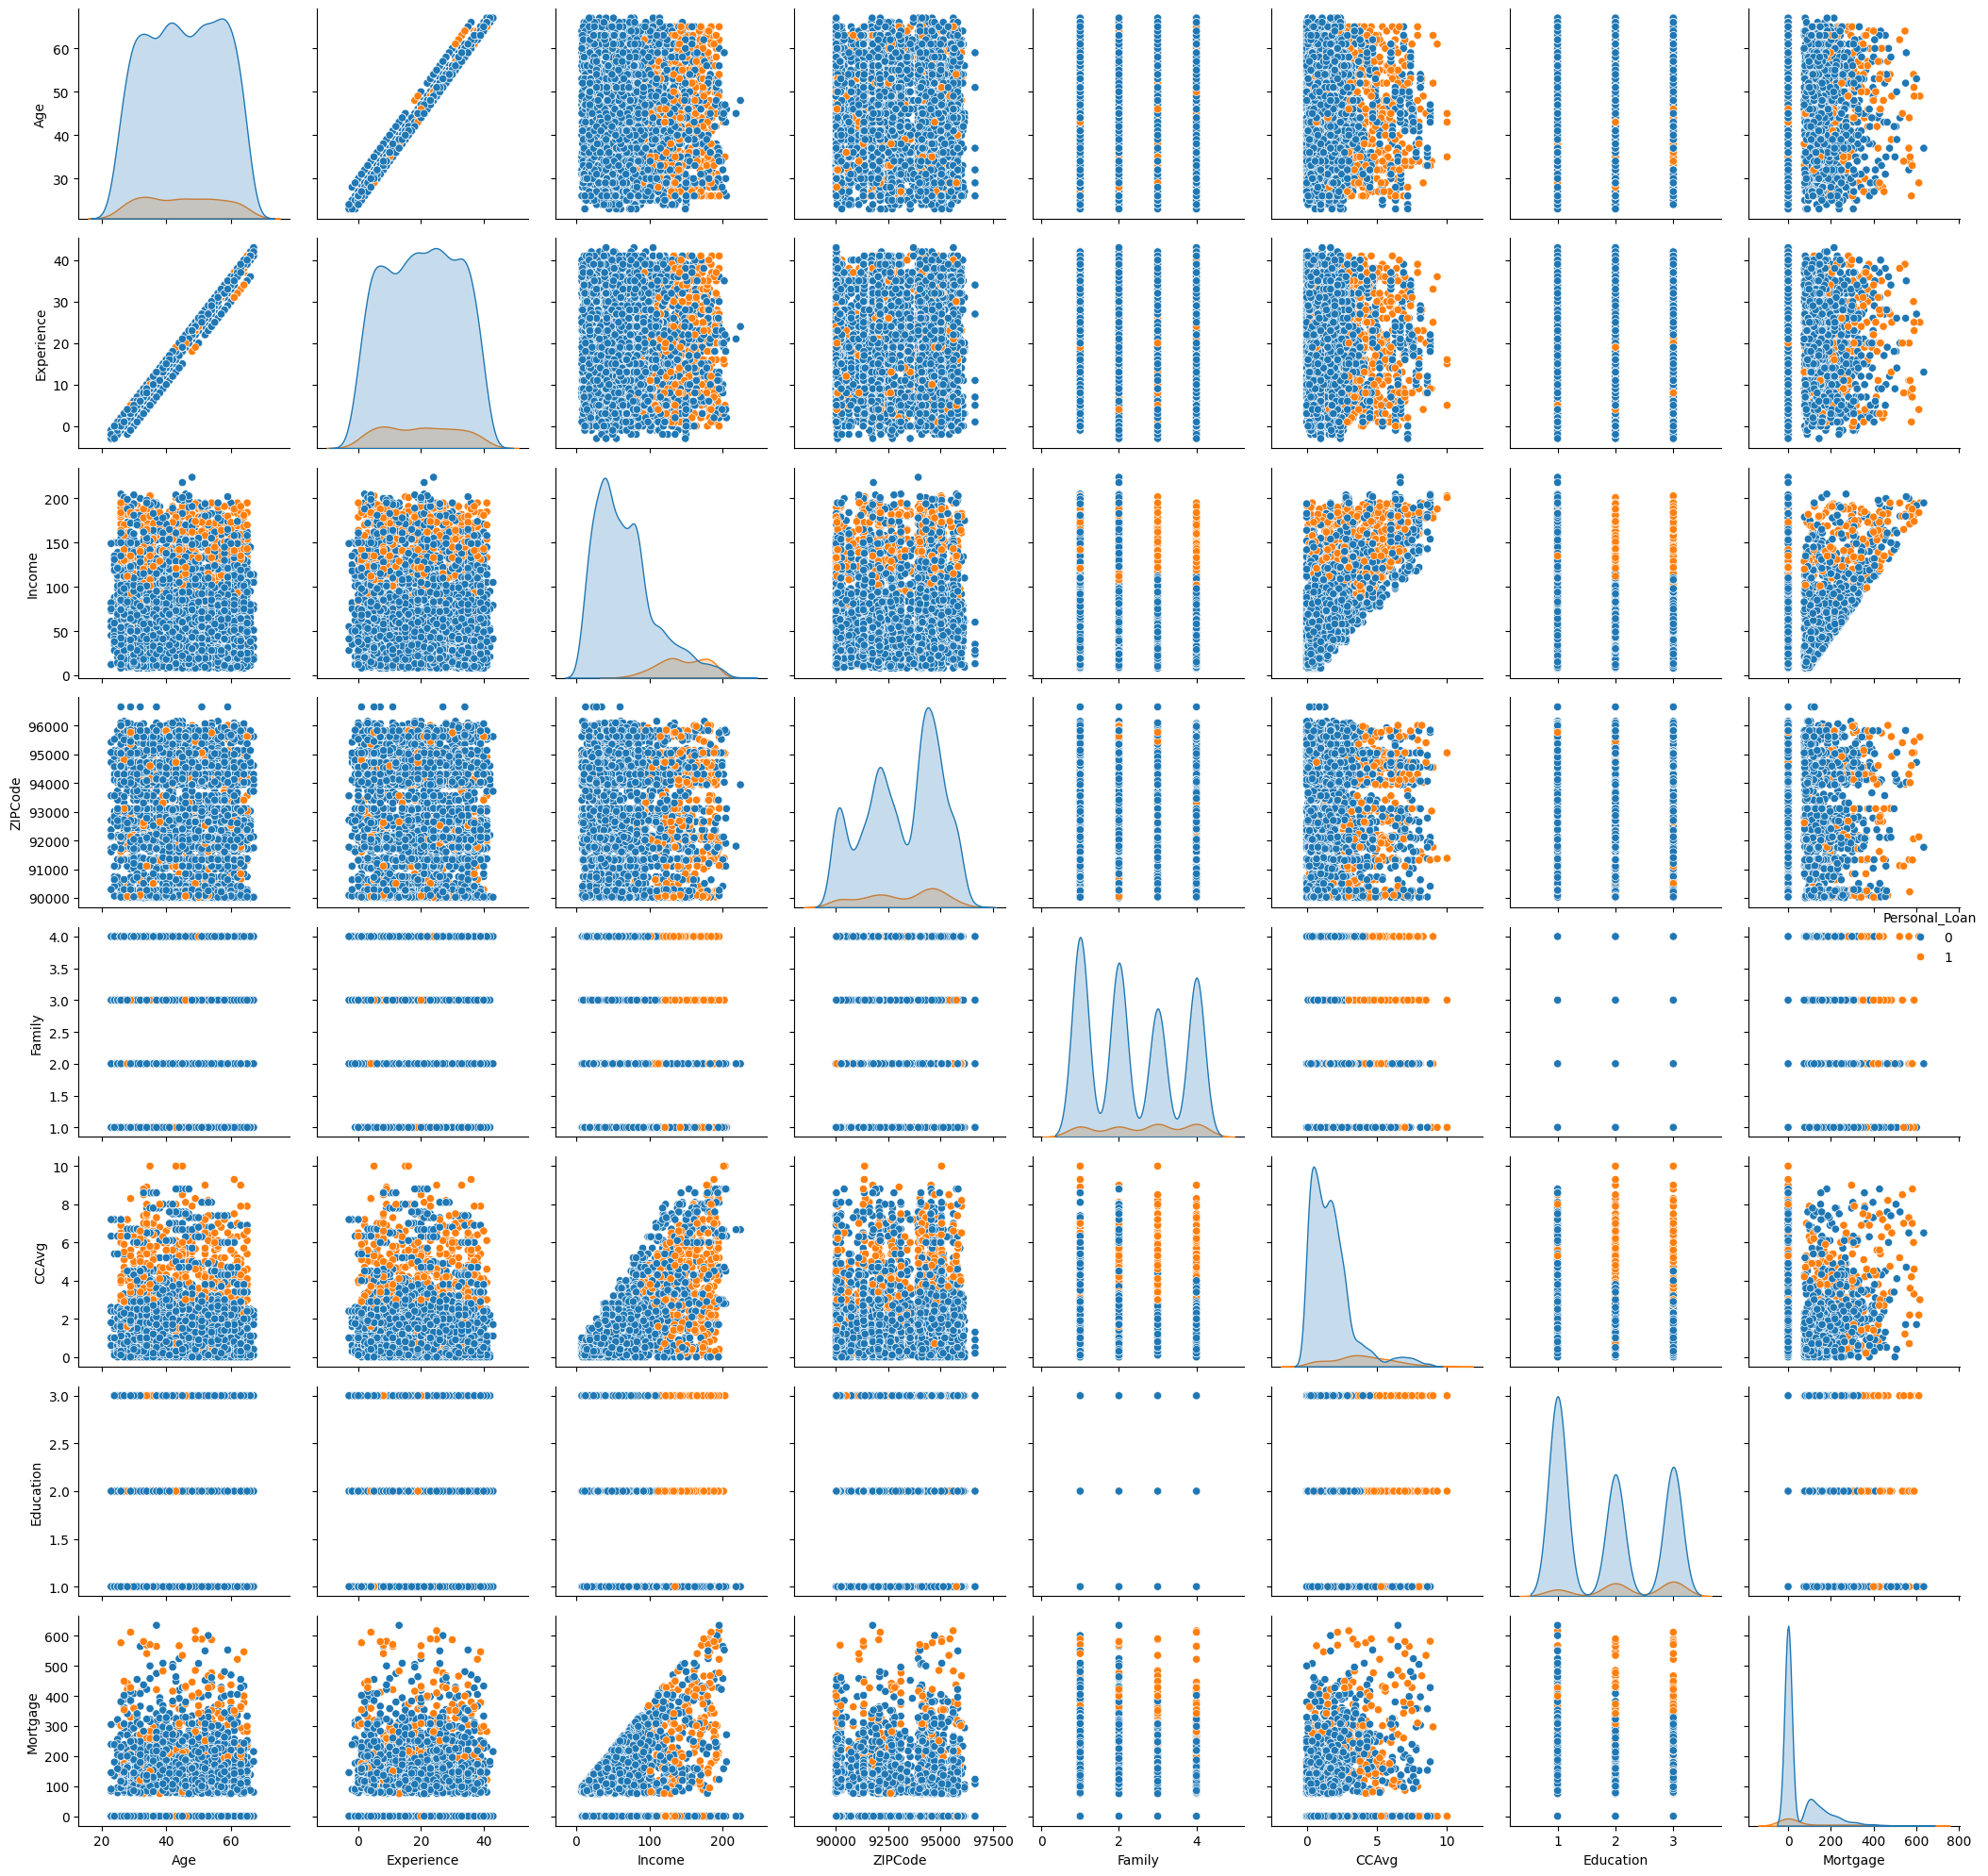

In [ ]:
#set the fetures for pairplot
features = ['Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','Personal_Loan']

#Creating pairplot
plt.figure(figsize=(25,15))
sns.pairplot(data=data[features],hue='Personal_Loan')
plt.tight_layout()


* Customers with high CCavg are like to take personal loan
* Customers with more than 2 education degrees and high CCAvg, higher mortgage are likely to get personal loan
* Customers with high income and high mortgage are taking up personal loan


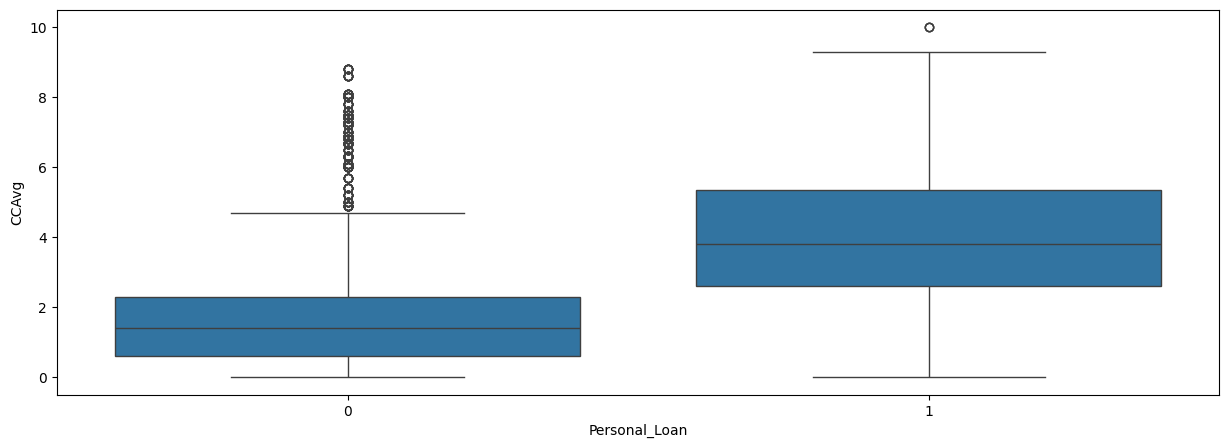

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='CCAvg',x='Personal_Loan')
plt.show()

* Most commonly, Customers with higher credit card spends are taking personal loans


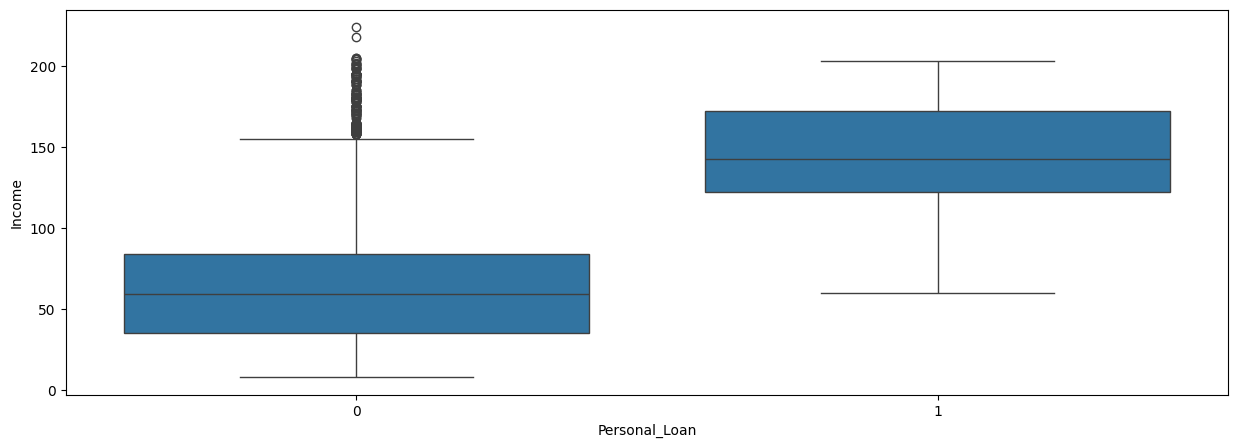

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='Income',x='Personal_Loan')
plt.show()

* Higher the income, more the chances of taking a personal loan

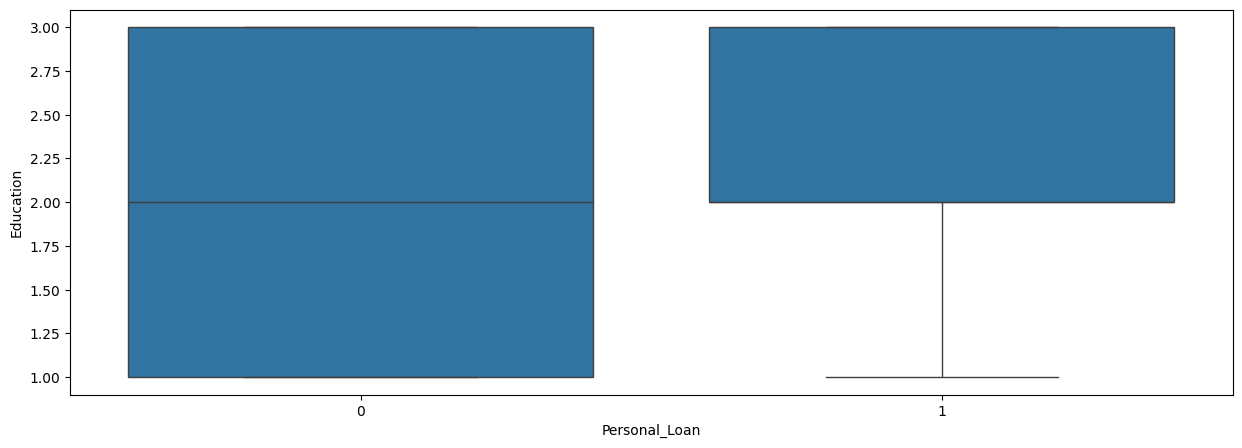

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='Education',x='Personal_Loan')
plt.show()


* In general higher the education, more the chances of taking a personal loan.
* Since 75% of the people opted for personal loan are having 2 or more degrees.

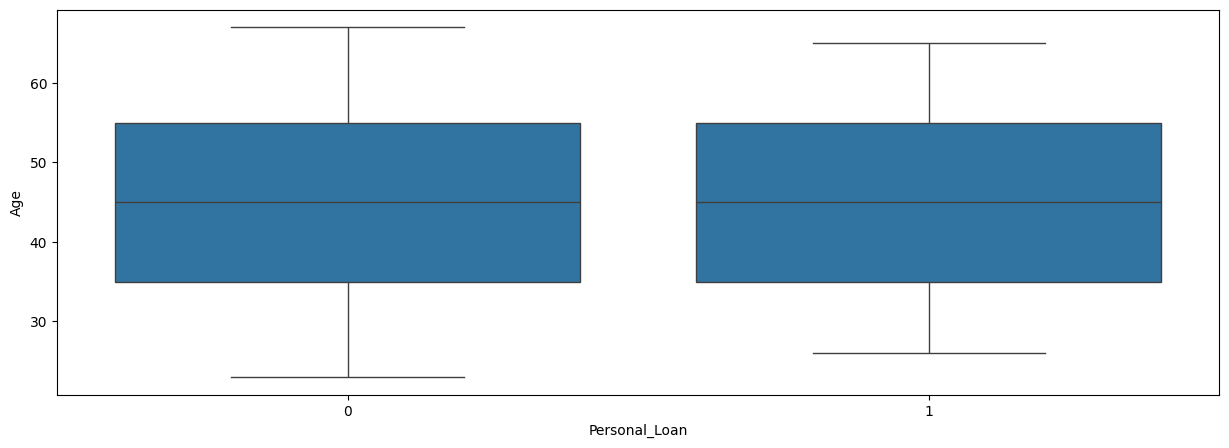

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='Age',x='Personal_Loan')
plt.show()


*  Age doesnot seem to have much impact on Personal loan

# **Data pre-processing for Modeling**

In [ ]:
#getting value counts for zipcode
data['ZIPCode'].value_counts()


ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
90068      1
90813      1
94404      1
94598      1
Name: count, Length: 467, dtype: int64

* The zipcode/geology is spread out and it may not have much impact on the decision. Hence, droping the column

In [ ]:
data.drop('ZIPCode',axis=1,inplace=True)

In [ ]:
#Dropping ID column from data
data.drop('ID',axis=1,inplace=True)

In [ ]:
# defining the explanatory (independent) and response (dependent) variables
x = data.drop('Personal_Loan',axis=1)
y = data['Personal_Loan']

In [ ]:
#get top 5 rows from x
x.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [ ]:
#get top 5 rows from y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [ ]:
# splitting the data in an 80:20 ratio for train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [ ]:
y_train.head()

408     0
3737    0
3889    0
568     0
1041    0
Name: Personal_Loan, dtype: int64

In [ ]:
#get the target va propotion for train and test set
print(100*y_train.value_counts(normalize=True))
print(100*y_test.value_counts(normalize=True))

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


# **Model building - Decision Tree**

In [ ]:
#initialising decision tree model
loan_model1 = DecisionTreeClassifier(random_state=42)

In [ ]:
#training the model with training data
loan_model1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#defining a function to calculate the evaluation metrics
def decision_tree_evaluation_metrics(model,predictors,target):
  predictions = model.predict(predictors)
  acc_score = accuracy_score(target,predictions)
  recall = recall_score(target,predictions)
  precision = precision_score(target,predictions)
  f1 = f1_score(target,predictions)
  df_metrics = pd.DataFrame({'Accuracy':acc_score,'Recall':recall,'Precision':precision,'f1_score':f1},index=[0])
  return df_metrics

In [ ]:
#Defining a funciton to create confusion matrix
def create_confusion_matrix(model,predictors,target):
  prediction = model.predict(predictors)
  cm = confusion_matrix(target,prediction)

  #visualising confusion matrix
  plt.figure(figsize=(15,5))
  sns.heatmap(data=cm,cmap='Blues',annot=True,fmt="")
  plt.ylabel('Predicted_Values')
  plt.xlabel('Actual_Values')

####Creating confusion matrix and observing metrics

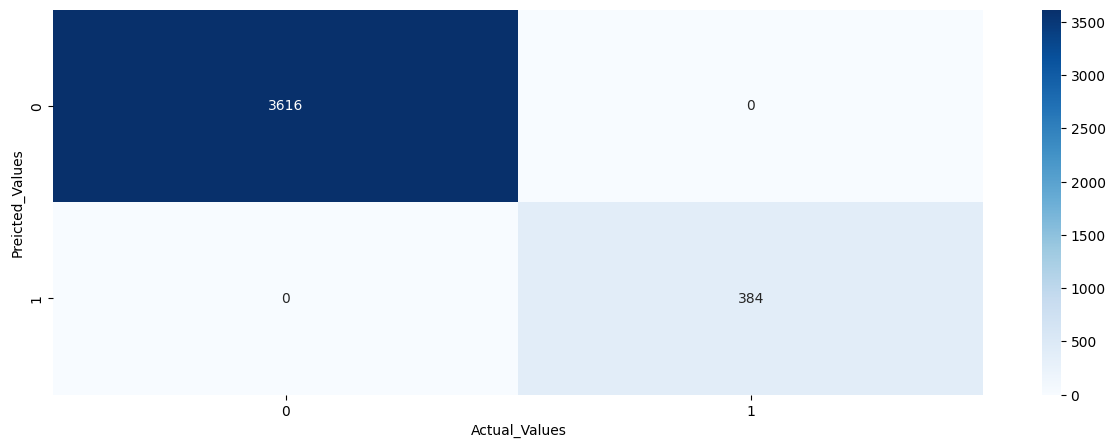

In [ ]:
#creating confusion matrix on training data set
create_confusion_matrix(loan_model1,x_train,y_train)

In [ ]:
#Metrics for training data
decision_tree_evaluation_metrics(loan_model1,x_train,y_train)

Accuracy  Recall  Precision  f1_score
0       1.0     1.0        1.0       1.0

* The model seems to do well with training data.

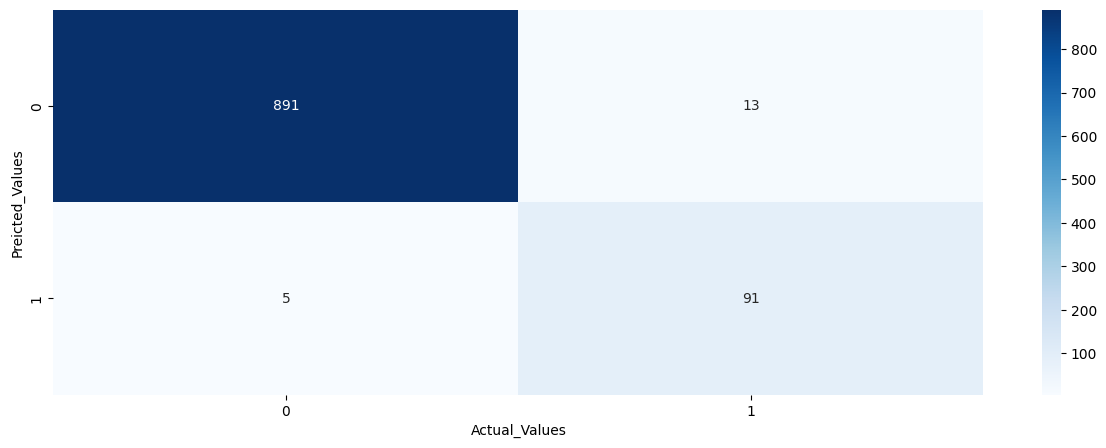

In [ ]:
#creating confusion matrix for test data
create_confusion_matrix(loan_model1,x_test,y_test)


In [ ]:
decision_tree_evaluation_metrics(loan_model1,x_test,y_test)

Accuracy    Recall  Precision  f1_score
0     0.982  0.947917      0.875      0.91

* There is not much difference in training and testing score
* There are only 18 instances where the model has wrongly predicted which is considerate.
* As we aim for high f1 score in general 91% is a very good score.
* The model has learnt well from the training data.
* The model is slightly overfitting

####Visualizing the tree

In [ ]:
#defining a function to create illustration of decision tree
def illustrate_decision_tree(model,predictors):
  #Illustrating the decision tree
  feature_list= list(predictors.columns)
  tree_map = tree.plot_tree(decision_tree=model,feature_names=feature_list,node_ids=False,filled=True,class_names=None,fontsize=10)

  #adding arrows to the tree
  for i in tree_map:
    arrow = i.arrow_patch
    if arrow is not None:
      arrow.set_edgecolor('black')
      arrow.set_linewidth(1)

  #display the tree
  plt.show()


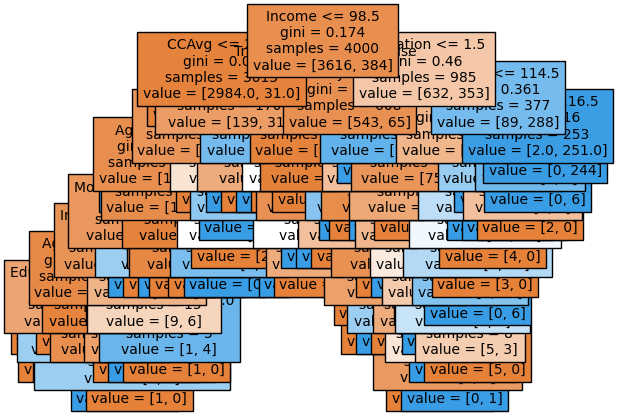

In [ ]:
#illustrating the decision tree using the function
illustrate_decision_tree(loan_model1,x_train)

* Tree size looks not very complex

In [ ]:
#defining a function to print the decision tree in text form
def decision_tree_in_text(model,predictors):
   feature_list= list(predictors.columns)
   #display the tree in text form
   print(tree.export_text(decision_tree=model,feature_names=feature_list,show_weights=True))

In [ ]:
decision_tree_in_text(loan_model1,x_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--

# **Model Performance Evaluation and Improvement**

### Decision Tree (Pre-pruning)

In [ ]:
#get the range of hyper-parameters to trial the model
max_depth_values = range(2,11,2)
max_leaf_nodes_values = range(10,51,10)
min_samples_split_values = range(10,51,10)

#initialise the variable to store best model and best score diff
best_model = None
best_score_diff = float('inf')

#iterate through the hyper-parameter
for depth_value in max_depth_values:
  for leaf_value in max_leaf_nodes_values:
    for split_value in min_samples_split_values:
      model = DecisionTreeClassifier(max_depth=depth_value, max_leaf_nodes=leaf_value,min_samples_split=split_value,random_state=42)

      #training the model
      model.fit(x_train,y_train)

      #Evaluating the model using f1 score
      pred_train = model.predict(x_train)
      f1_score_train = f1_score(y_train,pred_train)
      pred_test = model.predict(x_test)
      f1_score_test = f1_score(y_test,pred_test)

      #Calculating the score difference
      score_diff = abs(f1_score_train-f1_score_test)

      #getting the best score and model
      if score_diff < best_score_diff:
        best_score_diff = score_diff
        best_model=model



In [ ]:
#training the model based on best model
loan_model_pre_tune = best_model
loan_model_pre_tune.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=30, min_samples_split=10,
                       random_state=42)

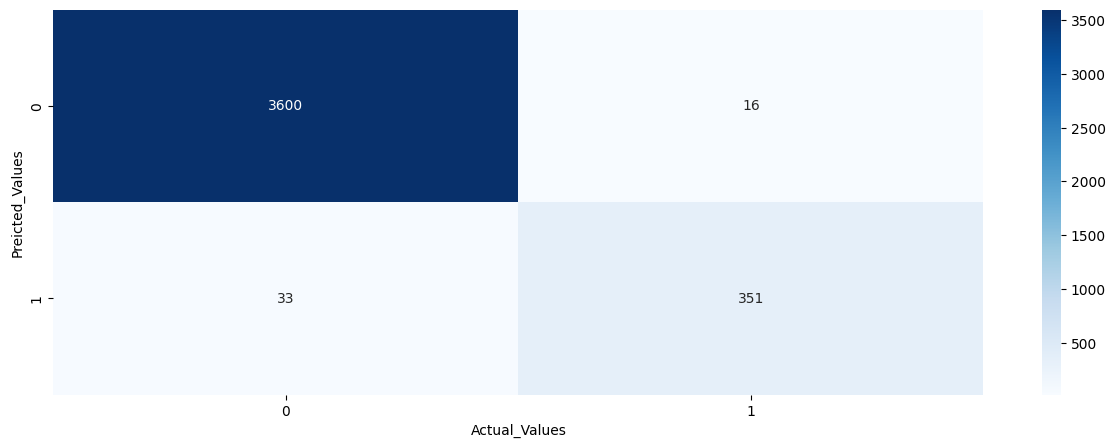

In [ ]:
#creating confusion matrix for training dataset
create_confusion_matrix(loan_model_pre_tune,x_train,y_train)

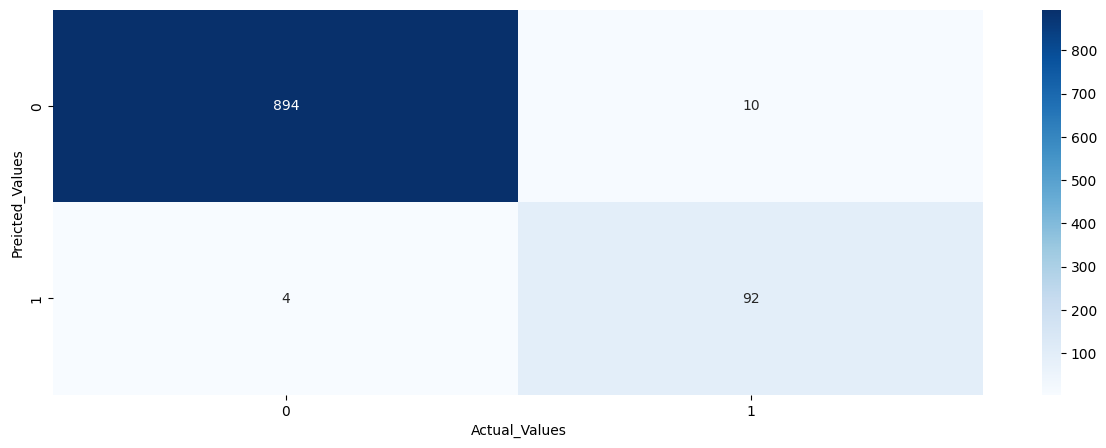

In [ ]:
#creating confusion matrix for test dataset
create_confusion_matrix(loan_model_pre_tune,x_test,y_test)

* The model performs well in test data than the training data.
* It has now generalised the data well

In [ ]:
#comparing the evaluation scores
print("Scores for training dataset: \n",decision_tree_evaluation_metrics(loan_model_pre_tune,x_train,y_train),"\n")
print("Scores for test dataset: \n",decision_tree_evaluation_metrics(loan_model_pre_tune,x_test,y_test))

Scores for training dataset: 
    Accuracy    Recall  Precision  f1_score
0   0.98775  0.914062   0.956403  0.934754 

Scores for test dataset: 
    Accuracy    Recall  Precision  f1_score
0     0.986  0.958333   0.901961  0.929293


* The accuracy and f1_scores of train and test datasets are almost same
* The model has generalised the data

### Visualizing the pre-tuned decision tree

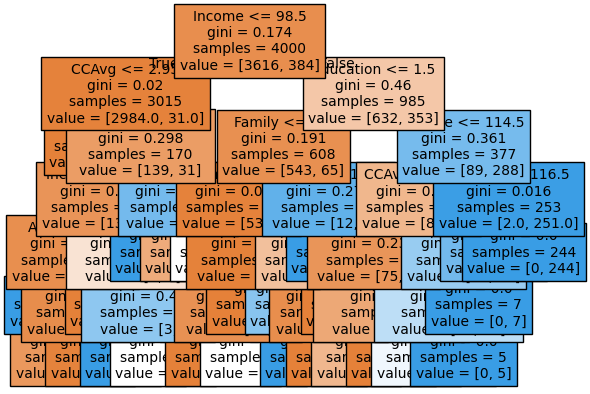

In [ ]:
#creating tree map for the model
illustrate_decision_tree(loan_model_pre_tune,x_train)

* The decision tree looks pretty simple now

In [ ]:
#illustrating decision tree as text
decision_tree_in_text(loan_model_pre_tune,x_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- weights: [61.00, 11.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.65
|   |   |   |   |   |   |--- weights: [66.00, 1.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |--- weights: [3.00, 3.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.25
|   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   

### Decision Tree (Post-pruning)

In [ ]:
#create an instance of model
loan_model_2 = DecisionTreeClassifier(random_state=42)

#get the ccp path
ccp_path = loan_model_2.cost_complexity_pruning_path(x_train,y_train)

#get alpha values
ccp_alphas = abs(ccp_path.ccp_alphas)

#get impurities
ccp_impurities = ccp_path.impurities

In [ ]:
#dispay alpha and impurities for the path
pd.DataFrame(ccp_path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000244    0.000487
2     0.000246    0.000980
3     0.000296    0.001869
4     0.000306    0.002788
5     0.000331    0.003780
6     0.000333    0.004113
7     0.000333    0.004446
8     0.000333    0.004780
9     0.000350    0.005830
10    0.000373    0.007321
11    0.000375    0.007696
12    0.000381    0.008077
13    0.000400    0.008477
14    0.000417    0.008894
15    0.000419    0.011410
16    0.000455    0.011865
17    0.000493    0.012850
18    0.000542    0.013934
19    0.000550    0.016133
20    0.000579    0.020187
21    0.000584    0.020771
22    0.000779    0.021550
23    0.000823    0.022373
24    0.000831    0.023204
25    0.000870    0.024945
26    0.002424    0.027369
27    0.002667    0.030036
28    0.003000    0.033036
29    0.003753    0.036789
30    0.020023    0.056812
31    0.021549    0.078361
32    0.047604    0.173568

In [ ]:
#iterate through the alphas to get the best f1 score
best_model = None
best_score_diff = float(0)

#iterating through alpha
for alpha in ccp_alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha,random_state=42)
  model.fit(x_train,y_train)

  #predict for test data
  pred_test = model.predict(x_test)
  f1_score_test = f1_score(y_test,pred_test)

  #calculate the max f1 score
  if f1_score_test > best_score_diff:
    best_score_diff = f1_score_test
    best_model = model

In [ ]:
#create instance of best model
loan_model_post_tune = best_model
loan_model_post_tune.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008702884311333967),
                       random_state=42)

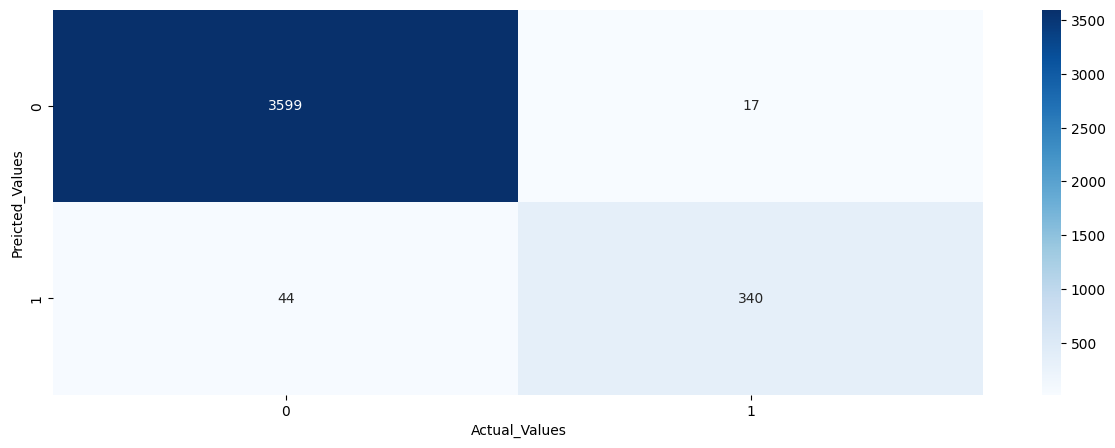

In [ ]:
#creating confusion matrix for training dataset
create_confusion_matrix(loan_model_post_tune,x_train,y_train)

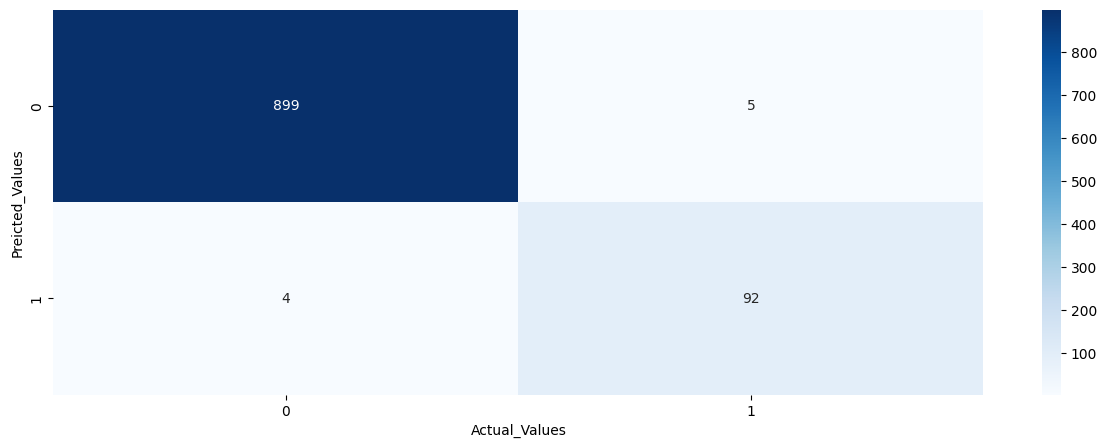

In [ ]:
#creating confusion matrix for testing dataset
create_confusion_matrix(loan_model_post_tune,x_test,y_test)

* The model performs well in testing data(unseen data) than the training dataset.
* The model has generalised the dataset well

In [ ]:
#comparing the evaluation scores
print("Scores for training dataset: \n",decision_tree_evaluation_metrics(loan_model_post_tune,x_train,y_train),"\n")
print("Scores for test dataset: \n",decision_tree_evaluation_metrics(loan_model_post_tune,x_test,y_test))

Scores for training dataset: 
    Accuracy    Recall  Precision  f1_score
0   0.98475  0.885417   0.952381  0.917679 

Scores for test dataset: 
    Accuracy    Recall  Precision  f1_score
0     0.991  0.958333   0.948454  0.953368


* The accuracy,recall, f1_scores of test dataset is higher than the training datasets.
* The model has generalised the data

### Visualizing the post pruned decision tree

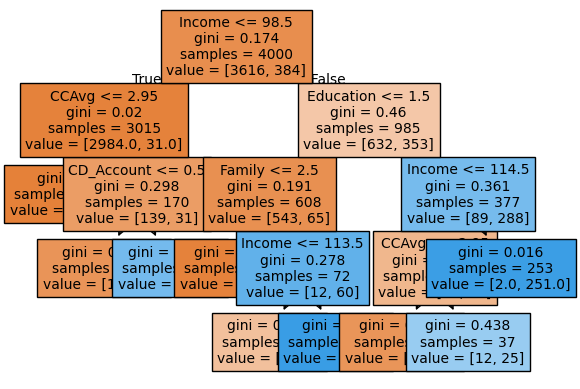

In [ ]:
#creating tree map for the model
illustrate_decision_tree(loan_model_post_tune,x_train)

* The decision tree looks even more simple now

In [ ]:
decision_tree_in_text(loan_model_post_tune,x_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



* the decision tree is a very simple tree now


### Creating a model using Grid search CV

In [ ]:
#Creating an optimised model using gridserach cv

#creating the parameter grid
param_grid = {
    'max_depth': range(1,11,2),
    'max_leaf_nodes': range(10,51,10),
    'min_samples_split': range(10,51,10)

    }

#initialising the model
loan_model_gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), param_grid = param_grid, cv=5, scoring='f1')

#training the model
loan_model_gridSearch.fit(x_train,y_train)

#get the best params
best_params = loan_model_gridSearch.best_params_
print("Best Params:\n",best_params)

#get the best f1 score
best_score = loan_model_gridSearch.best_score_
print("Best f1 Score:\n",best_score)




Best Params:
 {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_split': 40}
Best f1 Score:
 0.902220564127553


In [ ]:
#creating the model with the best params from grid search cv
loan_model_gridSearch2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],max_leaf_nodes=best_params['max_leaf_nodes'],min_samples_split=best_params['min_samples_split'],random_state=42)

#train the model
loan_model_gridSearch2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_split=40,
                       random_state=42)

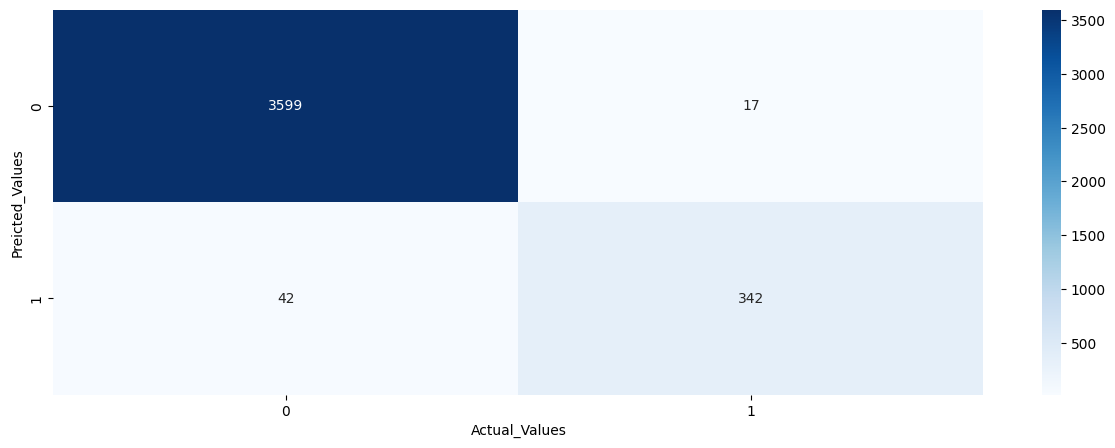

In [ ]:
#creating confusion matrix for training dataset
create_confusion_matrix(loan_model_gridSearch2,x_train,y_train)

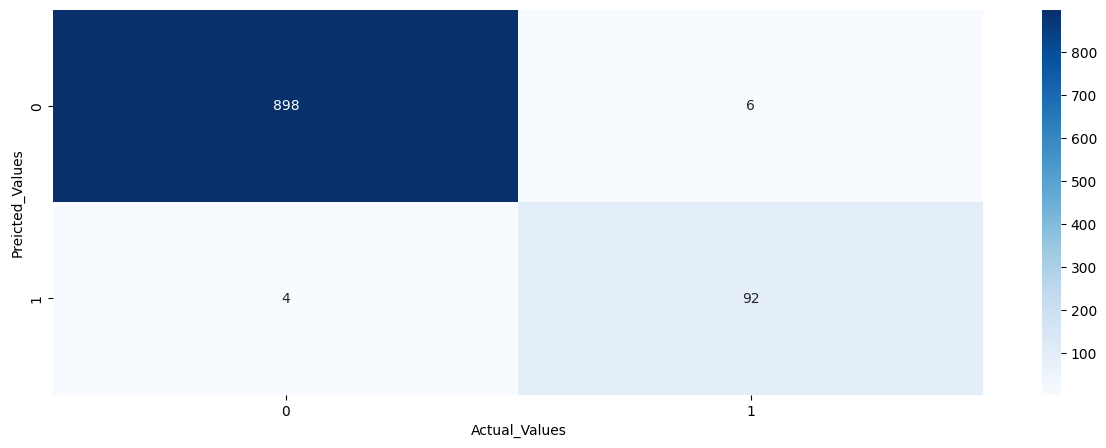

In [ ]:
#creating confusion matrix for testing dataset
create_confusion_matrix(loan_model_gridSearch2,x_test,y_test)

* The model performs well in testing data(unseen data) than the training dataset.
* The model has generalised the dataset well

In [ ]:
#comparing the evaluation scores
print("Scores for training dataset: \n",decision_tree_evaluation_metrics(loan_model_gridSearch2,x_train,y_train),"\n")
print("Scores for test dataset: \n",decision_tree_evaluation_metrics(loan_model_gridSearch2,x_test,y_test))

Scores for training dataset: 
    Accuracy    Recall  Precision  f1_score
0   0.98525  0.890625   0.952646  0.920592 

Scores for test dataset: 
    Accuracy    Recall  Precision  f1_score
0      0.99  0.958333   0.938776  0.948454


* The accuracy,recall, f1_scores of test dataset is higher than the training datasets.
* The model has generalised the data

### Visualizing the post pruned decision tree

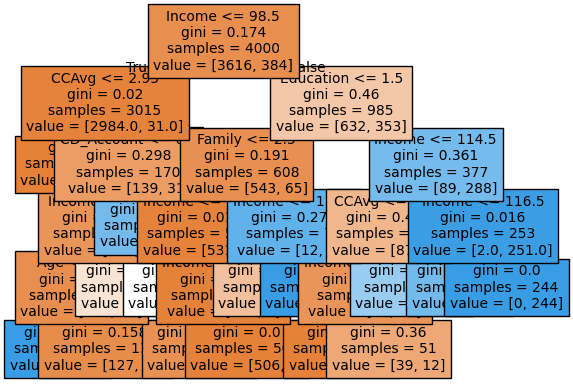

In [ ]:
#creating tree map for the model
illustrate_decision_tree(loan_model_gridSearch2,x_train)

* The decision tree looks simple

In [ ]:
decision_tree_in_text(loan_model_gridSearch2,x_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- weights: [127.00, 12.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [9.00, 7.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 99.50
|   |   |   |   |--- weights: [2.00, 2.00] class: 0
|   |   |   |--- Income >  99.50
|   |   |   |   |--- Income <= 104.50
|   |   |   |   |   |--- weights: [23.00, 3.00] class: 0
|   |   |   |   |--- Income >  104.50
|   |   |   |   |   |--- weights: [506.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weig

* the decision tree is a simple tree


# **Model Performance Comparison and Final Model Selection**

In [ ]:
#compute the evaluation scores for all the models for training data

df_model_score = []
model_list = [loan_model1,loan_model_pre_tune,loan_model_post_tune,loan_model_gridSearch2]
for model in model_list:
  df_model_score.append(decision_tree_evaluation_metrics(model,x_train,y_train).T)

df_model_score = pd.concat(df_model_score,axis=1)
df_model_score.columns = ['DecisionTree(default)','DecisionTree(pre-prune)','DecisionTree(post-prune)','DecisionTree(gridSearchCV)']
df_model_score



DecisionTree(default)  DecisionTree(pre-prune)  \
Accuracy                     1.0                 0.987750   
Recall                       1.0                 0.914062   
Precision                    1.0                 0.956403   
f1_score                     1.0                 0.934754   

           DecisionTree(post-prune)  DecisionTree(gridSearchCV)  
Accuracy                   0.984750                    0.985250  
Recall                     0.885417                    0.890625  
Precision                  0.952381                    0.952646  
f1_score                   0.917679                    0.920592

In [ ]:
#compute the evaluation scores for all the models for test data

df_model_score = []
model_list = [loan_model1,loan_model_pre_tune,loan_model_post_tune,loan_model_gridSearch2]
for model in model_list:
  df_model_score.append(decision_tree_evaluation_metrics(model,x_test,y_test).T)

df_model_score = pd.concat(df_model_score,axis=1)
df_model_score.columns = ['DecisionTree(default)','DecisionTree(pre-prune)','DecisionTree(post-prune)','DecisionTree(gridSearchCV)']
df_model_score


DecisionTree(default)  DecisionTree(pre-prune)  \
Accuracy                0.982000                 0.986000   
Recall                  0.947917                 0.958333   
Precision               0.875000                 0.901961   
f1_score                0.910000                 0.929293   

           DecisionTree(post-prune)  DecisionTree(gridSearchCV)  
Accuracy                   0.991000                    0.990000  
Recall                     0.958333                    0.958333  
Precision                  0.948454                    0.938776  
f1_score                   0.953368                    0.948454

- The pre-pruned, post-pruned and grid search model decision trees exhibit generalized performances.

- The pre-pruned decision tree has slightly under performed on the test set than the training sets.
    - This model uses a few more features for decision-making than the post-pruned and grid serach cv decision trees.
    - This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.
    - Based on the f1 score of test set, the score has slightly dropped from the training set

- The post-pruned decision tree has exibited better performance on the test set than the training set.
    - This model uses the same features as the gridsearchCV model for decision-making.
    - This will result in a low prediction time than the pre-pruned model
    - Based on the f1 score of test set, the score has the highest score of 0.953368 and much better than  training set

- The gridSearch decision tree has better performance on test set than the training set
    - This model uses the same features as the post-prune model for decision-making.
    - This will result in a low prediction time than the pre-pruned model
    - Based on the f1 score of test set, the score has the highest score of 0.953368 and much better than  training set

- the **pre-pruned decision tree** (`loan_model_pre_tune`) seems like the most suitable model.  While the post-pruned and GridSearchCV models achieved high accuracy, the pre-pruned model, despite slightly underperforming on the test set compared to the training set, generalizes well and is likely to perform better on truly unseen data.  


### Feature Importance

In [ ]:
#get feature importance for pre-tuned model
feature_importance = loan_model_pre_tune.feature_importances_
indices = np.argsort(feature_importance)
df_feature = pd.DataFrame(feature_importance[indices],indices)
df_feature

0
7   0.000000
10  0.000000
1   0.002469
6   0.003053
0   0.005234
9   0.005286
8   0.015418
4   0.057334
3   0.137054
5   0.327200
2   0.446951

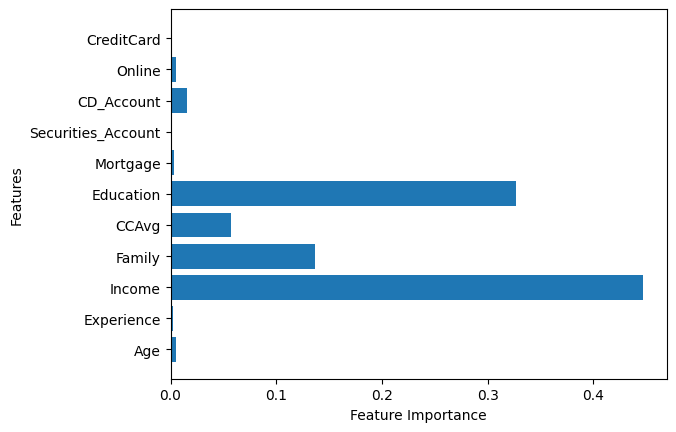

In [ ]:
#plotting the feature importance
plt.barh(df_feature.index,df_feature[0])
plt.xlabel("Feature Importance")
plt.yticks(df_feature.index,x_train.columns[df_feature.index])
plt.ylabel("Features")
plt.show()

- Income and education are the most influential attributes in determining whether the customer will opt for personal loan
- Family and Average credit spends are the next best attributes to consider.
- Already holding a credit card, having securities account, Mortgage, Experience have least importance in determining whether the customer will opt for personal loan

# **Actionable Insights & Recommendations**

###Key takeaways for the marketing team
*	Concentrate on high-income and highly educated customers for the campaign.
*	The marketing team can offer special promotions to attract these customers.
*	The next focus should be on customers with larger families and high average credit card spending.
*	This group tends to be good spenders with a higher likelihood of taking personal loans to meet their needs.
*	Therefore, the marketing team should promote to this segment to bring them into the business.
* 	The marketing campaign should place the least emphasis on customers who already possess the bank's credit card and have securities accounts.
*	Age and experience are not significant factors in decision-making, so the campaign should prioritize all age groups equally.

###Conclusion

* The decision tree model has helped to identify the importance of each feature.
* The decision tree model helps to group the customers for the marketting team based on the feature importace. This helps to focus each groups with different aspects.
* The Education and income being the most important features in determining whether the customer takes a personal loan
* While Age and experience have least importance.

###Business recommendation

*	Prioritize the campaign by targeting the high-income and highly educated customer segment, as they represent the highest strategic value.
*	Implement special promotional offers for this demographic, given their propensity to secure personal loans.
*	Subsequently, focus on customers with larger households and significant credit card expenditures.
*	These customers exhibit substantial spending behavior; hence, tailoring personal loan offerings with exclusive incentives can effectively capture their interest.
*	Initiate a digital marketing campaign across social media and other online platforms to engage customers utilizing online banking services.
*	Incorporate testimonials from current credit card holders into the campaign and feature them prominently on the company’s website to enhance credibility.
*	Data indicates that only 10% of the customer base has opted for personal loans. By emphasizing high-income families, we can drive higher customer acquisition.
*	A notable proportion of online banking customers have already secured personal loans. Therefore, deploy targeted pop-up notifications or personalized advertisements to promote personal loans upon login.
* Adding new data for training on a cycle will boost the model performance.